___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

# Load the dataset

In [3]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
#     'DISTANCE',
    'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [4]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
#     'DISTANCE' : 'int32',
    'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
#     'REM_Dest' : 'string',
}

___

## 1. Load the dataset

In [5]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns_v2.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns_v2.csv'

In [6]:
%%time

df = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df.sample(5)

Wall time: 1min 9s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
1403072,06,3,AA,RIC,CLT,13,15,9,0,15,2,30.08,90.0,0.0,34.0,(missing),9.94,0.0,3.0,30.15,84.0,0.0,48.0,BKN,10.0,0.0,5.0
7077539,05,5,G4,AUS,VPS,21,14,8,0,23,3,29.80,78.0,0.0,79.0,OVC,10.00,21.0,10.0,29.99,73.0,0.0,92.0,CLR,10.0,0.0,0.0
107846,04,2,OO,GNV,ATL,18,13,8,0,20,2,30.16,74.0,0.0,52.0,CLR,10.00,0.0,7.0,30.17,66.0,0.0,49.0,BKN,10.0,0.0,3.0
5663764,03,3,DL,SLC,CLE,17,16,6,0,22,7,30.05,59.0,0.0,15.0,(missing),9.94,0.0,18.0,30.03,45.0,0.0,71.0,(missing),8.7,0.0,7.0
5258224,08,2,B6,FLL,PVD,12,17,4,0,15,5,30.08,86.0,0.0,65.0,BKN,10.00,0.0,13.0,30.05,87.0,0.0,36.0,BKN,10.0,0.0,6.0


## Altair

In [119]:
%%writefile streamlit_flight_delay_predictor_v2.py

import streamlit as st
import streamlit.components.v1 as components
import os
import joblib
from joblib import load
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt
import shap
import datetime

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Define the dataset columns:
cols = [
    'MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
    'ORIGIN',
    'DEST',
    'DEP_TIME_hour',
    'TAXI_OUT_median',
    'TAXI_IN_median',
    'ARR_DEL15', # Not in model
    'ARR_TIME_hour',
    'DISTANCE_GROUP',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest'
]

cols_dtypes = {
    'MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
    'ORIGIN' : 'string',
    'DEST' : 'string',
    'DEP_TIME_hour' : 'string',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
    'ARR_DEL15' : 'int32',
    'ARR_TIME_hour' : 'string',
    'DISTANCE_GROUP' : 'string',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
}


# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Load the data:
@st.cache
def load_data():
    preprocessed_input_csv_path = os.path.join(root,
                                               "Output_Data",
                                               "US_DoT-NOAA",
                                               "OTP_LCD_allColumns_v2.csv")
    df = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
    X = df.drop(['ARR_DEL15'], axis=1)
    y = df['ARR_DEL15']
    return df, X, y

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Load the model:
# @st.cache
def load_model(path=""):
    model = load(path)
    return model

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def frontend_appearance():
    """
    Design frontend appearance
    """

    # frontend elements of the web page 
    html_temp = """ 
    <div style ="background-color:powderblue;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Flight Delay Prediction ML App</h1> 
    </div> 
    """   
    # display the frontend aspect
    st.markdown(html_temp, unsafe_allow_html = True)

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------  

def user_inputs(df):
    """
    Define user input fields
    """

    # Load the target-encoding mapper dictionary:
    te_map_file = open("te_map_file.pkl", "rb")
    te_map_dict = pickle.load(te_map_file)
    
#     add_selectbox = st.sidebar.selectbox("How would you like to be contacted?", ("Email", "Home phone", "Mobile phone"))
    
    # Create user input fields:
    # Categorical:
    # Date:
    fdate = st.date_input("Flight date", value=datetime.date(2019, 7, 6),
                          min_value=datetime.date(2019, 1, 1), max_value=datetime.date(2019, 12, 31))
    fmonth = str(fdate.month)
    fweekday = str(fdate.isoweekday())
    # Carrier:
    carriers_dict = {
                        '9E' : '[9E] Endeavor Air Inc.',
                        'AA' : '[AA] American Airlines Inc.',
                        'AS' : '[AS] Alaska Airlines Inc.',
                        'B6' : '[B6] JetBlue Airways',
                        'DL' : '[DL] Delta Air Lines Inc.',
                        'EV' : '[EV] ExpressJet Airlines LLC',
                        'F9' : '[F9] Frontier Airlines Inc.',
                        'G4' : '[G4] Allegiant Air',
                        'HA' : '[HA] Hawaiian Airlines Inc.',
                        'MQ' : '[MQ] Envoy Air',
                        'NK' : '[NK] Spirit Air Lines',
                        'OH' : '[OH] PSA Airlines Inc.',
                        'OO' : '[OO] SkyWest Airlines Inc.',
                        'UA' : '[UA] United Air Lines Inc.',
                        'WN' : '[WN] Southwest Airlines Co.',
                        'YV' : '[YV] Mesa Airlines Inc.',
                        'YX' : '[YX] Republic Airline'
                   }
#     carrier = st.selectbox('Airline', sorted(list(te_map_dict['OP_UNIQUE_CARRIER'])), format_func = carriers_dict.get)
    carrier = st.selectbox('Airline', df['OP_UNIQUE_CARRIER'].value_counts().index, format_func = carriers_dict.get)
    
    # Origin:
    origin = st.selectbox('Origin', sorted(list(te_map_dict['ORIGIN'])))
    # Destination:
    dest = st.selectbox('Destination', sorted(list(te_map_dict['DEST'])))
    # Departure time:
    deptime = st.selectbox('Departure time', sorted([int(hour) for hour in list((te_map_dict['DEP_TIME_hour']))]))
    arrtime = st.selectbox('Arrival time', sorted([int(hour) for hour in list((te_map_dict['ARR_TIME_hour']))]))
    distgroup = st.selectbox('Distance group', sorted([int(group) for group in list((te_map_dict['DISTANCE_GROUP']))]))
    skyorigin = st.selectbox('Sky conditions (Origin)', sorted(list(te_map_dict['HourlySkyConditions_Origin'])))
    skydest = st.selectbox('Sky conditions (Dest)', sorted(list(te_map_dict['HourlySkyConditions_Dest'])))
    
    # Numerical:
    taxiout = st.number_input('TAXI_OUT_median')
    taxiin = st.number_input('TAXI_IN_median')
    altsetorigin = st.slider('ORIGIN - Altimeter Setting [inHg]', min_value=27., max_value=32., value=30., step=0.25)
    temporigin = st.slider('ORIGIN - Temperature [ºF]', min_value=-50, max_value=130, value=65, step=5)
    preciporigin = st.number_input('HourlyPrecipitation_Origin')
    relhumorigin = st.number_input('HourlyRelativeHumidity_Origin')
    visiborigin = st.number_input('HourlyVisibility_Origin')
    gustorigin = st.number_input('HourlyWindGustSpeed_Origin')
    windorigin = st.number_input('HourlyWindSpeed_Origin')
    altsetdest = st.slider('DESTINATION - Altimeter Setting [inHg]', min_value=27., max_value=32., value=30., step=0.25)
    tempdest = st.slider('DESTINATION - Temperature [ºF]', min_value=-50, max_value=130, value=65, step=5)
    precipdest = st.number_input('HourlyPrecipitation_Dest')
    relhumdest = st.number_input('HourlyRelativeHumidity_Dest')
    visibdest = st.number_input('HourlyVisibility_Dest')
    gustdest = st.number_input('HourlyWindGustSpeed_Dest')
    winddest = st.number_input('HourlyWindSpeed_Dest')

    user_inputs = [fmonth, fweekday, carrier, origin, dest, deptime,
                   int(float(taxiout)), int(float(taxiin)), arrtime, distgroup, 
                   altsetorigin, temporigin, preciporigin, relhumorigin, skyorigin, visiborigin, gustorigin, windorigin,
                   altsetdest, tempdest, precipdest, relhumdest, skydest, visibdest, gustdest, winddest]
    
    return user_inputs

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def te_mapper(te_dict, x):
    """
    Mapper function to apply Training's target encoded values to user categorical inputs
    """
    
    try:
        te_mapper = te_dict[x] # If category appeared in Training dataset, apply the corresponding value
    except KeyError:
        te_mapper = np.median(list(te_dict.values())) # Otherwise, apply the median from the entire Training dataset
    return te_mapper

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

@st.cache()
def target_encoding(X_test):
    """
    Take the user input variables and apply the 'te_mapper' encoding to prepare data for model feeding
    """
    # Load the target-encoding mapper dictionary:
    te_map_file = open("te_map_file.pkl", "rb")
    te_map_dict = pickle.load(te_map_file)

    # Declare which features are going to be target-encoded:
    te_features = X_test.select_dtypes(['string', 'category']).columns.to_list()
    
    # Map the values using the 'te_mapper' function:
    for cat_col in te_features:
        X_test[cat_col + '_te'] = X_test[cat_col].apply(lambda x: te_mapper(te_map_dict[cat_col], x))
    # Drop the original features to harmonize format:
    X_test.drop(te_features, axis=1, inplace=True)
    
    return X_test        

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def prediction(model, prepared_data):  
    # Making predictions: 
    prediction = model.predict(prepared_data)
    score = model.predict_proba(prepared_data)[0, 0]
    if prediction == 0:
        result = 'ON-TIME'
    else:
        result = 'DELAYED'
    return result, score

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# @st.cache
# def SHAP_individual_graphs(prepared_data):   
#     # Load the explainer file (instead of generating it so as to save time):
#     explainer = joblib.load(filename='SHAP_explainer.bz2')
#     # Compute SHAP values for this particular flight:
#     shap_values = explainer(prepared_data)
    
#     # Visualize prediction's explanation:
#     shap.plots.waterfall(shap_values=shap_values[0], max_display=prepared_data.shape[1], show=True)
#     plt.show()

#     # load JS visualization code to notebook:
#     shap.initjs()
#     # visualize prediction's explanation with a force plot:
#     shap.plots.force(base_value=explainer.expected_value, shap_values=shap_values[0], matplotlib=True)

def st_shap(plot, height=None):
    shap_html = f"<head>{shap.getjs()}</head><body>{plot.html()}</body>"
    components.html(shap_html, height=height)

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def shap_images(path=""):
    st.image(image=path, output_format='PNG')

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def upload_file():
    uploaded_file = st.file_uploader("Choose a file")
    if uploaded_file is not None:
        # Can be used wherever a "file-like" object is accepted:
        dataframe = pd.read_csv(uploaded_file)
        st.write(dataframe)    

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

if __name__=='__main__': 
    # Let the user know the data is loading:
    data_load_state = st.text('Loading data...')
    # Load the data:
    df, X, y = load_data()
    # Notify the user that the data was successfully loaded:
    if st.checkbox(label="SHAP Summary Plot", value=False) == False:
        data_load_state.title('') 
    else:
        data_load_state.title('SHAP Summary Plot')
        st.write(':sunglasses:')
        shap_images("SHAP_values_global.png")
    model = load_model(path="XGBoost_32_best_dask_rscv.joblib.dat")
    frontend_appearance()
    inputs = user_inputs(df)
#     upload_file()
    dismissed_cols = ['ARR_DEL15']
    X_test = pd.DataFrame(
            data=np.array(inputs)[np.newaxis], # Kind of transpose the resulting array from the 'inputs' list
            columns=[col for col in cols if col not in dismissed_cols]
        )
    cols_dtypes_frontend = cols_dtypes.copy()
    for col in dismissed_cols:
        del cols_dtypes_frontend[col]
    X_test = X_test.astype(cols_dtypes_frontend)
    prepared_data = target_encoding(X_test)
    
    # When 'Predict' is clicked, make the prediction and store it: 
    if st.button("Predict"):
        result = prediction(model, prepared_data)[0]
        score = prediction(model, prepared_data)[1]
        if result == 'ON-TIME':
            st.success('The flight is likely to be {} ({:5.2f}%)'.format(result, 100*score))
        elif result == 'DELAYED':
            st.warning('The flight is likely to be {} ({:5.2f}%)'.format(result, 100*(1-score)))
#         SHAP_individual_graphs(prepared_data)
#         explainer = shap.TreeExplainer(model)
        explainer = joblib.load(filename='SHAP_explainer.bz2')
        shap_values = explainer.shap_values(prepared_data)
        st_shap(shap.force_plot(explainer.expected_value, shap_values[0,:], prepared_data.iloc[0,:]))

Overwriting streamlit_flight_delay_predictor_v2.py


In [117]:
df['ORIGIN'].unique()

<StringArray>
['TYS', 'SRQ', 'DTW', 'LGA', 'ROA', 'TPA', 'RDU', 'BOS', 'MSP', 'JAX',
 ...
 'AKN', 'SCC', 'GUM', 'PPG', 'CDV', 'WRG', 'PSG', 'DLG', 'YAK', 'GST']
Length: 341, dtype: string

In [ ]:
df['ORIGIN'].unique()

In [ ]:
dict(zip(df['ORIGIN']))

In [114]:
df['OP_UNIQUE_CARRIER'].value_counts().index

Index(['WN', 'DL', 'AA', 'OO', 'UA', 'YX', 'MQ', 'B6', 'OH', 'AS', '9E', 'YV',
       'NK', 'F9', 'EV', 'G4', 'HA'],
      dtype='object')

In [43]:
import streamlit as st
import streamlit.components.v1 as components
import os
import joblib
from joblib import load
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt
import shap

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Define the dataset columns:
cols = [
    'MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
    'ORIGIN',
    'DEST',
    'DEP_TIME_hour',
    'TAXI_OUT_median',
    'TAXI_IN_median',
    'ARR_DEL15',
    'ARR_TIME_hour',
    'DISTANCE_GROUP',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest'
]

cols_dtypes = {
    'MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
    'ORIGIN' : 'string',
    'DEST' : 'string',
    'DEP_TIME_hour' : 'string',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
    'ARR_DEL15' : 'int32',
    'ARR_TIME_hour' : 'string',
    'DISTANCE_GROUP' : 'string',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
}

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Load the data:
# @st.cache
def load_data():
    preprocessed_input_csv_path = os.path.join(root,
                                               "Output_Data",
                                               "US_DoT-NOAA",
                                               "OTP_LCD_allColumns_v2.csv")
    df = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
    X = df.drop(['ARR_DEL15'], axis=1)
    y = df['ARR_DEL15']
    return df, X, y

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Load the model:
# @st.cache
def load_model(path=""):
    model = load(path)
    return model

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def frontend_appearance():
    """
    Design frontend appearance
    """

    # frontend elements of the web page 
    html_temp = """ 
    <div style ="background-color:powderblue;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Flight Delay Prediction ML App</h1> 
    </div> 
    """   
    # display the frontend aspect
    st.markdown(html_temp, unsafe_allow_html = True)

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------  
    
def user_inputs():
    """
    Define user input fields
    """

    # Load the target-encoding mapper dictionary:
    te_map_file = open("te_map_file.pkl", "rb")
    te_map_dict = pickle.load(te_map_file)
   
    # Create user input fields:
    # Categorical:
    month = st.selectbox('Month', sorted(list(te_map_dict['MONTH'])))
    weekday = st.selectbox('Weekday', sorted(list(te_map_dict['DAY_OF_WEEK'])))
    carrier = st.selectbox('A/L', sorted(list(te_map_dict['OP_UNIQUE_CARRIER'])))
    origin = st.selectbox('Origin', sorted(list(te_map_dict['ORIGIN'])))
    dest = st.selectbox('Destination', sorted(list(te_map_dict['DEST'])))
    deptime = st.selectbox('Departure time', sorted([int(hour) for hour in list((te_map_dict['DEP_TIME_hour']))]))
    arrtime = st.selectbox('Arrival time', sorted([int(hour) for hour in list((te_map_dict['ARR_TIME_hour']))]))
    distgroup = st.selectbox('Distance group', sorted([int(group) for group in list((te_map_dict['DISTANCE_GROUP']))]))
    skyorigin = st.selectbox('Sky conditions (Origin)', sorted(list(te_map_dict['HourlySkyConditions_Origin'])))
    skydest = st.selectbox('Sky conditions (Dest)', sorted(list(te_map_dict['HourlySkyConditions_Dest'])))
    
    # Numerical:
    taxiout = st.number_input('TAXI_OUT_median')
    taxiin = st.number_input('TAXI_IN_median')
    altsetorigin = st.number_input('HourlyAltimeterSetting_Origin')
    temporigin = st.number_input('HourlyDryBulbTemperature_Origin')
    preciporigin = st.number_input('HourlyPrecipitation_Origin')
    relhumorigin = st.number_input('HourlyRelativeHumidity_Origin')
    visiborigin = st.number_input('HourlyVisibility_Origin')
    gustorigin = st.number_input('HourlyWindGustSpeed_Origin')
    windorigin = st.number_input('HourlyWindSpeed_Origin')
    altsetdest = st.number_input('HourlyAltimeterSetting_Dest')
    tempdest = st.number_input('HourlyDryBulbTemperature_Dest')
    precipdest = st.number_input('HourlyPrecipitation_Dest')
    relhumdest = st.number_input('HourlyRelativeHumidity_Dest')
    visibdest = st.number_input('HourlyVisibility_Dest')
    gustdest = st.number_input('HourlyWindGustSpeed_Dest')
    winddest = st.number_input('HourlyWindSpeed_Dest')
    
    user_inputs = [month, weekday, carrier, origin, dest, deptime, int(float(taxiout)), int(float(taxiin)), arrtime, distgroup, 
                   altsetorigin, temporigin, preciporigin, relhumorigin, skyorigin, visiborigin, gustorigin, windorigin,
                   altsetdest, tempdest, precipdest, relhumdest, skydest, visibdest, gustdest, winddest]
    result = "ABCDE"
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
#         result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your flight is {}'.format(result))
        print(result)
    
    return user_inputs

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def te_mapper(te_dict, x):
    """
    Mapper function to apply Training's target encoded values to user categorical inputs
    """
    
    try:
        te_mapper = te_dict[x] # If category appeared in Training dataset, apply the corresponding value
    except KeyError:
        te_mapper = np.median(list(te_dict.values())) # Otherwise, apply the median from the entire Training dataset
    return te_mapper

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# @st.cache()
def target_encoding(X_test):
    """
    Take the user input variables and apply the 'te_mapper' encoding to prepare data for model feeding
    """
    # Load the target-encoding mapper dictionary:
    te_map_file = open("te_map_file.pkl", "rb")
    te_map_dict = pickle.load(te_map_file)

    # Declare which features are going to be target-encoded:
    te_features = X_test.select_dtypes(['string', 'category']).columns.to_list()
    
    # Map the values using the 'te_mapper' function:
    for cat_col in te_features:
        X_test[cat_col + '_te'] = X_test[cat_col].apply(lambda x: te_mapper(te_map_dict[cat_col], x))
    # Drop the original features to harmonize format:
    X_test.drop(te_features, axis=1, inplace=True)
    
    return X_test        

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def prediction(model, prepared_data):  
    # Making predictions: 
    prediction = model.predict(prepared_data)
    score = model.predict_proba(prepared_data)[0, 0]
    if prediction == 0:
        result = 'ON-TIME'
    else:
        result = 'DELAYED'
    return result, score

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# @st.cache
def SHAP_individual_graphs(X_test):
    # Load the explainer file (instead of generating it so as to save time):
    explainer = joblib.load(filename='SHAP_explainer.bz2')
    # Compute SHAP values for this particular flight:
    shap_values = explainer(X_test)
    
    # Visualize prediction's explanation:
    shap.plots.waterfall(shap_values[0])

    # load JS visualization code to notebook:
    shap.initjs()
    # visualize prediction's explanation with a force plot:
    fp = shap.plots.force(shap_values[0])
    display(fp)
    

The flight is likely to be DELAYED ( 0.32%)


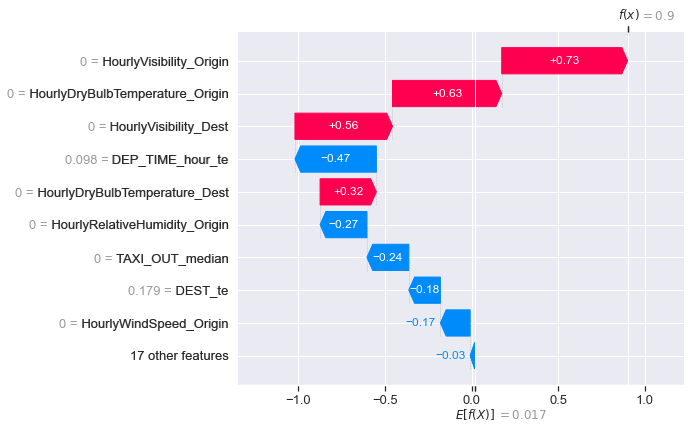

In [14]:
# df, X, y = load_data()
# model = load_model(path="XGBoost_32_best_dask_rscv.joblib.dat")
frontend_appearance()
inputs = user_inputs()
X_test = pd.DataFrame(
        data=np.array(inputs)[np.newaxis], # Kind of transpose the resulting array from the 'inputs' list
        columns=[col for col in cols if col != 'ARR_DEL15']
    )
cols_dtypes_frontend = cols_dtypes.copy()
del cols_dtypes_frontend['ARR_DEL15']
X_test = X_test.astype(cols_dtypes_frontend)
# X_test
prepared_data = target_encoding(X_test)
# prepared_data
result = prediction(model, prepared_data)[0]
score = prediction(model, prepared_data)[1]
if result == 'ON-TIME':
    print('The flight is likely to be {} ({:5.2f}%)'.format(result, score))
elif result == 'DELAYED':
    print('The flight is likely to be {} ({:5.2f}%)'.format(result, score))
SHAP_individual_graphs(X_test)    

In [16]:
# @st.cache
def SHAP_individual_graphs(X_test):
    # Load the explainer file (instead of generating it so as to save time):
    explainer = joblib.load(filename='SHAP_explainer.bz2')
    # Compute SHAP values for this particular flight:
    shap_values = explainer(X_test)
    
    # Visualize prediction's explanation:
    shap.plots.waterfall(shap_values[0])

    # load JS visualization code to notebook:
    shap.initjs()
    # visualize prediction's explanation with a force plot:
    fp = shap.plots.force(shap_values[0])
    display(fp)

In [17]:
X_test

,TAXI_OUT_median,TAXI_IN_median,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest,MONTH_te,DAY_OF_WEEK_te,OP_UNIQUE_CARRIER_te,ORIGIN_te,DEST_te,DEP_TIME_hour_te,ARR_TIME_hour_te,DISTANCE_GROUP_te,HourlySkyConditions_Origin_te,HourlySkyConditions_Dest_te
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185967,0.197726,0.175434,0.189732,0.178888,0.098013,0.237436,0.177485,0.194667,0.192195


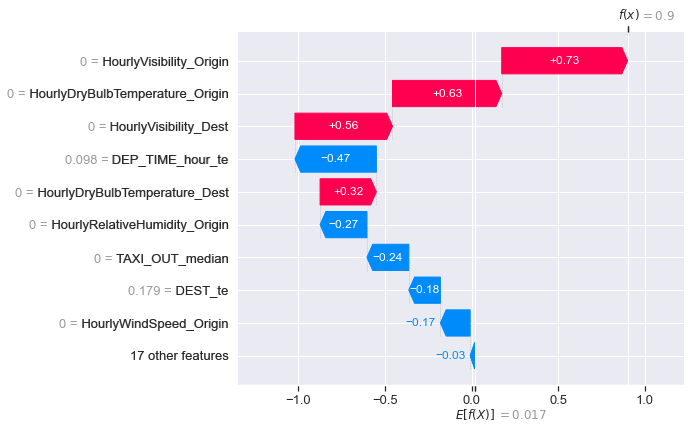

In [18]:
SHAP_individual_graphs(X_test)

In [42]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

2021-03-29 20:58:44.529 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-49750ae0-6740-4fc5-b9ca-98a31fcbe605


2021-03-29 20:59:19.834 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:19+0200 lvl=info msg="no configuration paths supplied"
2021-03-29 20:59:19.837 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:19+0200 lvl=info msg="using configuration at default config path" path=C:\\Users\\turge/.ngrok2/ngrok.yml
2021-03-29 20:59:19.839 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:19+0200 lvl=info msg="open config file" path=C:\\Users\\turge\\.ngrok2\\ngrok.yml err=nil
2021-03-29 20:59:19.851 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:19+0200 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-03-29 20:59:20.252 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:20+0200 lvl=info msg="tunnel session started" obj=tunnels.session
2021-03-29 20:59:20.256 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:20+0200 lvl=info msg="client session established" obj=csess id=9fcf00278044
2021-03-29 20:59:20.273 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:20+0200 lvl=info 

<NgrokTunnel: "http://9dbf0a7a86e5.ngrok.io" -> "http://localhost:8501">

2021-03-29 20:59:20.534 INFO    pyngrok.process.ngrok: t=2021-03-29T20:59:20+0200 lvl=info msg=end pg="/api/tunnels/http-8501-49750ae0-6740-4fc5-b9ca-98a31fcbe605 (http)" id=3f010f4fcb716cf6 status=200 dur=1.0074ms


___